In [6]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from read_yse_ztf_snana import read_YSE_ZTF_snana_dir as snana

In [7]:
full_snid_list, full_meta_list, full_df_list = snana("Type II")

In [8]:
full_meta_list

[{'object_id': '2019lbi',
  'original_object_id': '2019lbi',
  'ra': 190.088004,
  'dec': 1.273998,
  'mwebv': 0.015,
  'redshift': 0.013,
  'redshift_err': 0.005,
  'redshift_type': 'SPEC-Z',
  'redshift_frame': 'HELIO',
  'photo_z': 0.038,
  'photoz_err': 0.012,
  'sn_offset': 14.831,
  'host_gal_name': 'WISEA J124020.15+011624.2',
  'host_gal_name_source': '(NED)',
  'host_gal_z': 0.0158,
  'host_gal_z_err': 0.005,
  'host_gal_z_type': 'HOST-Z',
  'host_gal_z_frame': 'HELIO',
  'peakmjd': 58676.172,
  'host_logmass': -99.0,
  'peak_abs_mag': -16.708,
  'transient_spec_class': 'SNII',
  'spectype_3class': 'SNII',
  'parsnip_pred_class': 'SNIa',
  'parsnip_pred_conf': '43.6',
  'parsnip_s1': -0.063,
  'parsnip_s1_err': 0.127,
  'parsnip_s2': 0.761,
  'parsnip_s2_err': 0.272,
  'parsnip_s3': -0.109,
  'parsnip_s3_err': 0.123,
  'superraenn_pred_class': 'SNII',
  'superraenn_pred_conf': '70.6',
  'ztf_zeropoint': 27.5,
  'peakSNR': 61.164,
  'max_mjd_gap': 23.018,
  'nobs_before_peak': 

at least some points before peak mag 

at least 7 points in lightcurve

nobs_before_peak > 0:

        nobs_before_peak + nobs_after_peak >= 7:
    
~~signal to noise < .2~~ 

C:\Users\JV\AppData\Local\Temp\ipykernel_29384\206415446.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(idx)


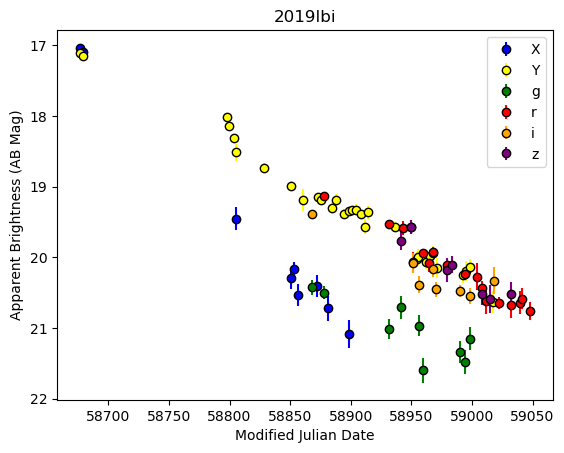

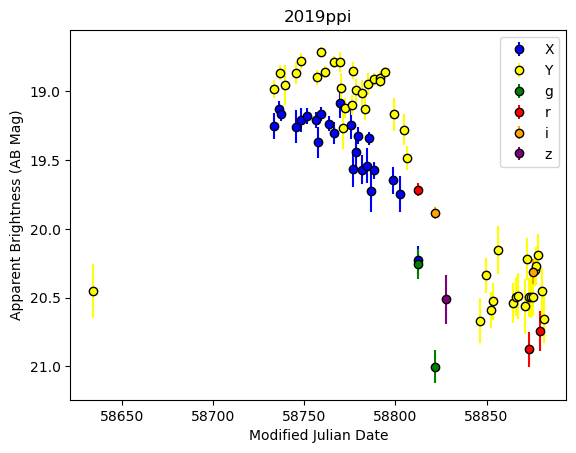

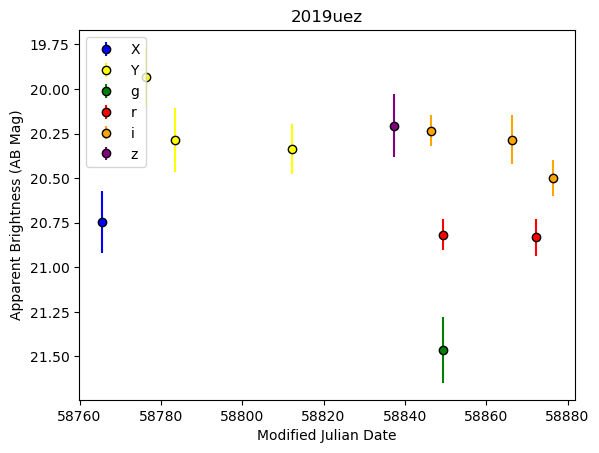

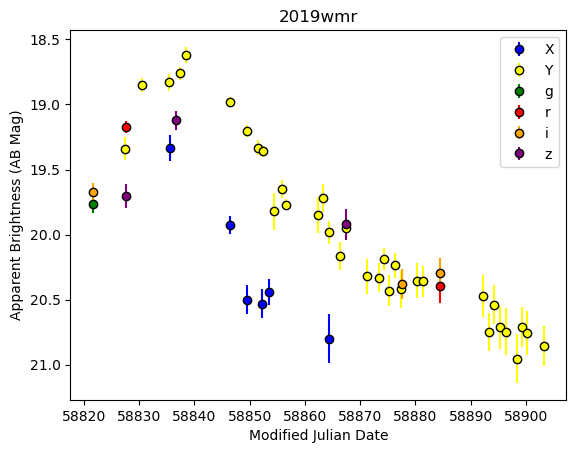

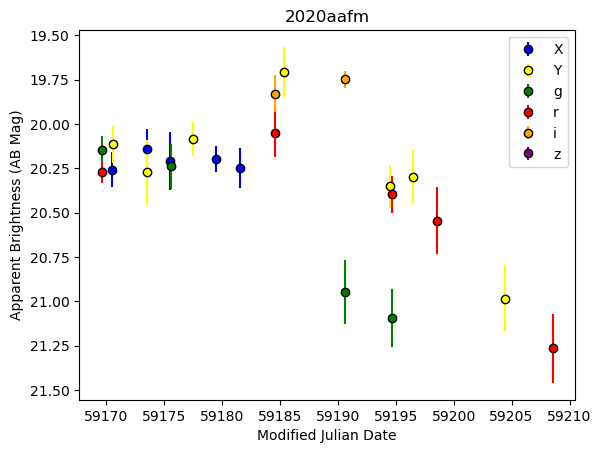

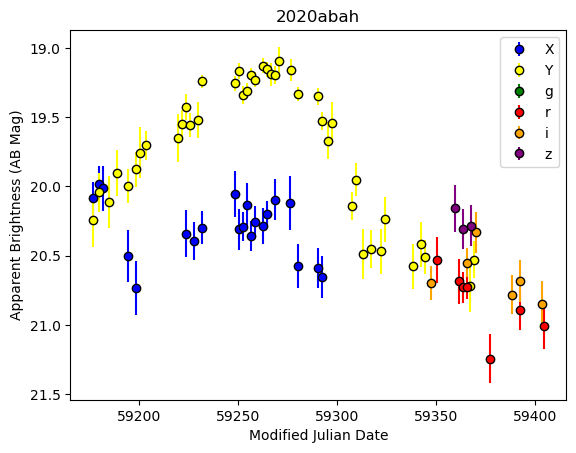

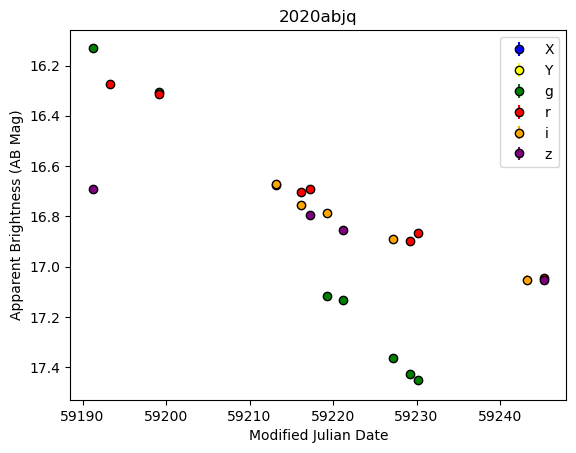

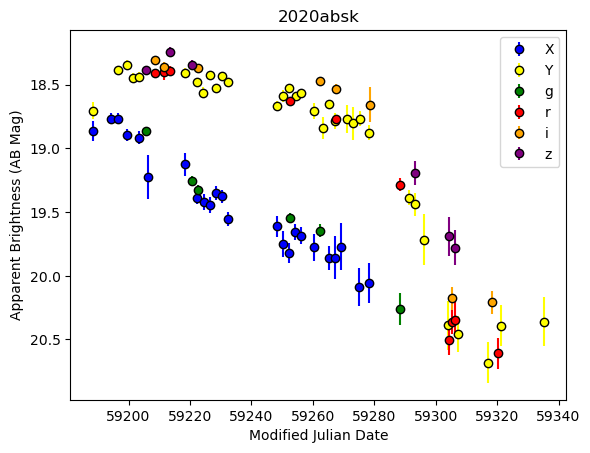

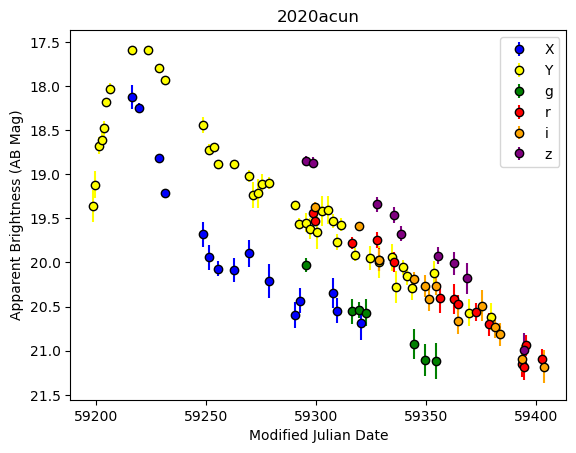

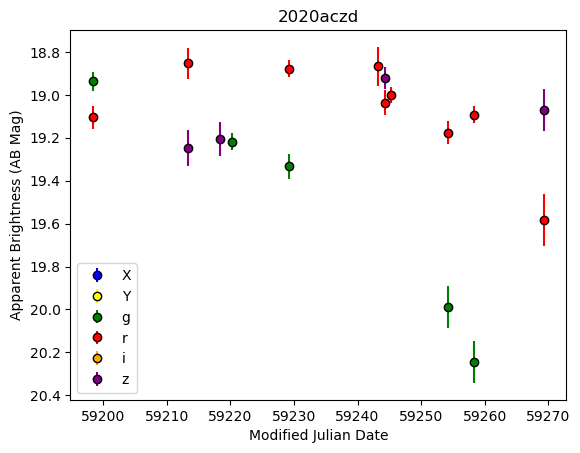

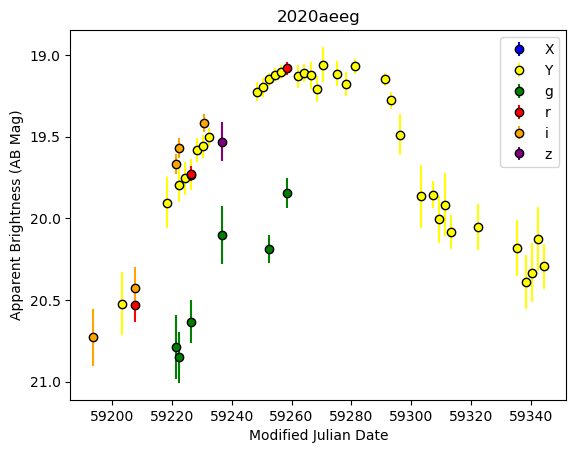

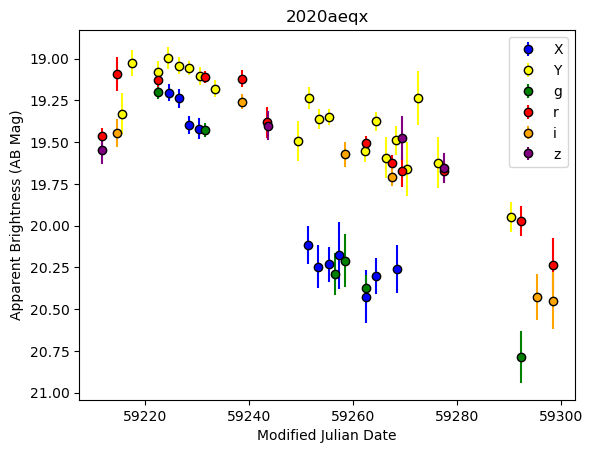

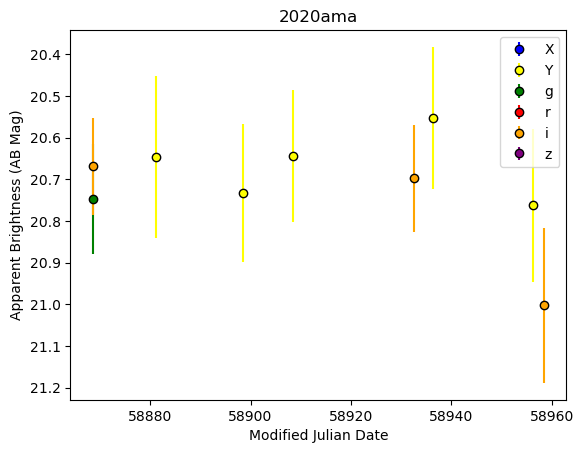

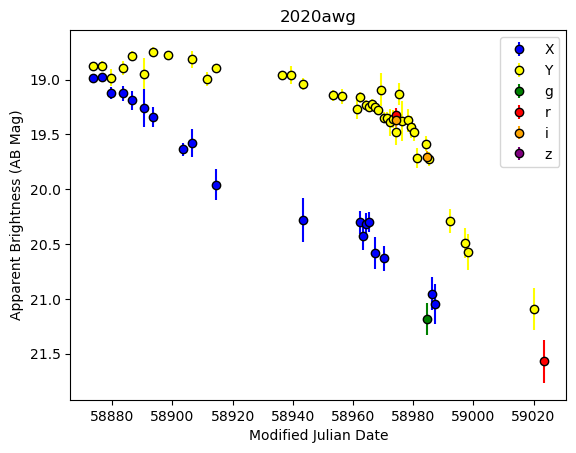

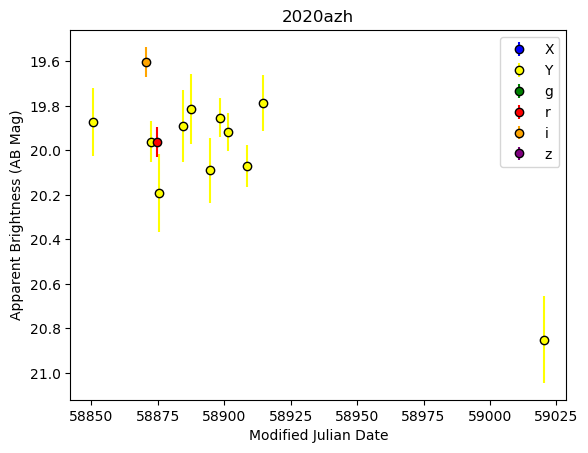

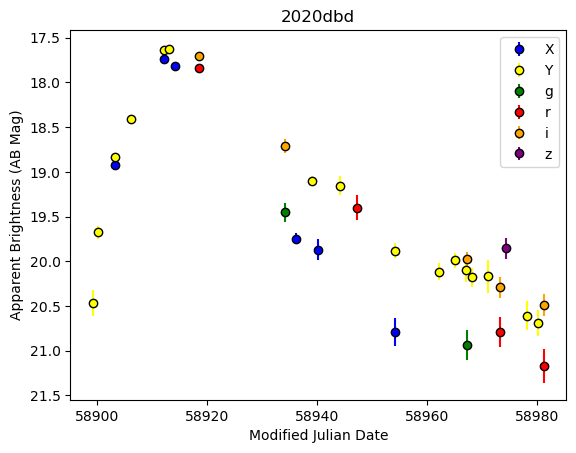

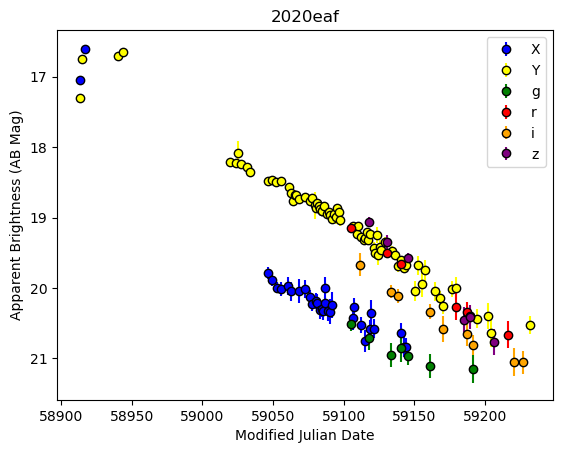

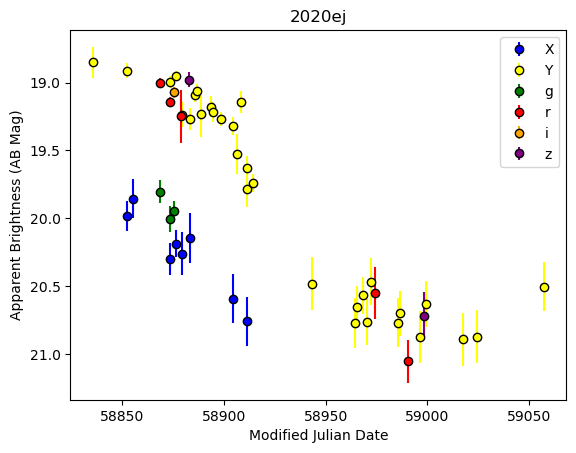

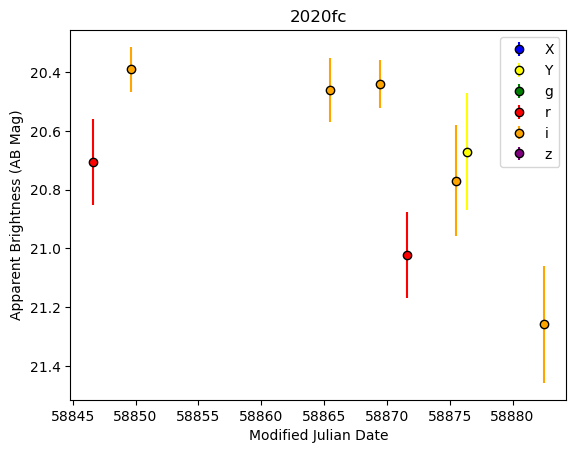

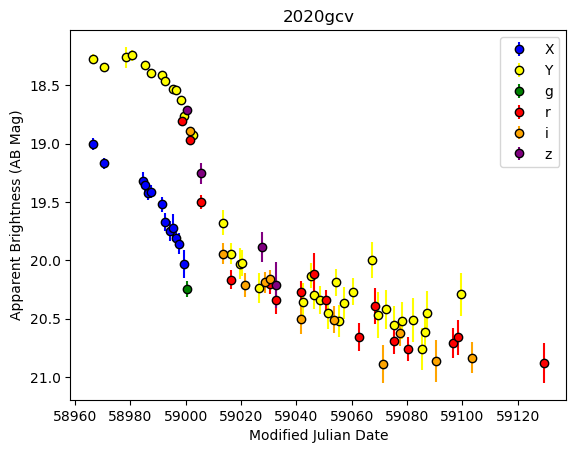

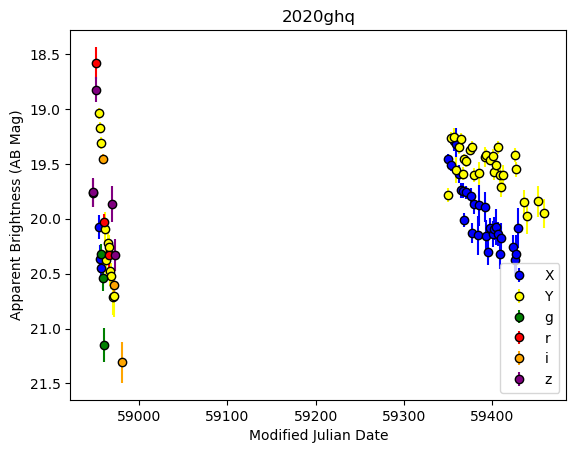

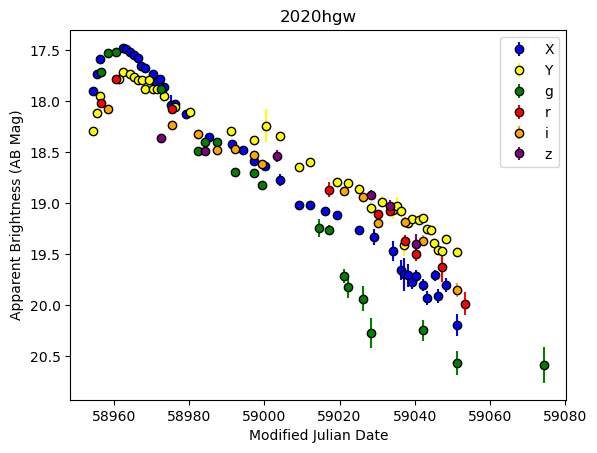

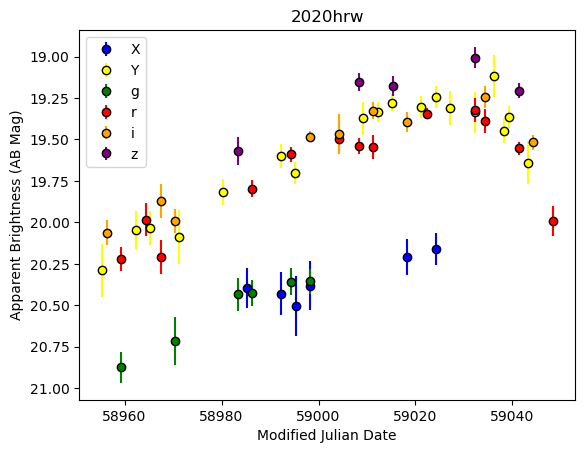

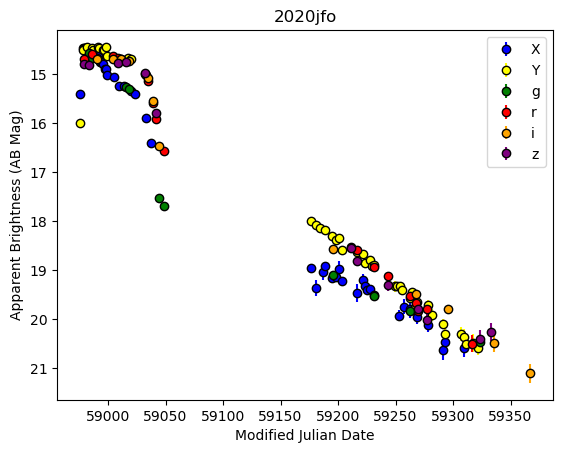

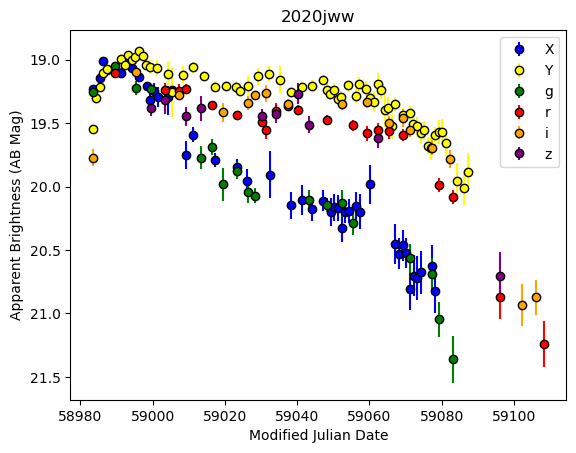

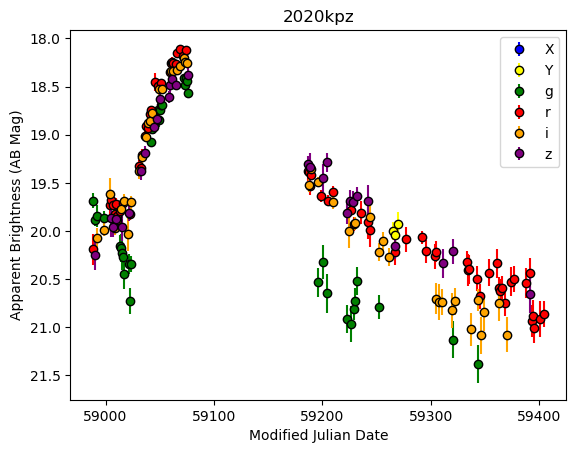

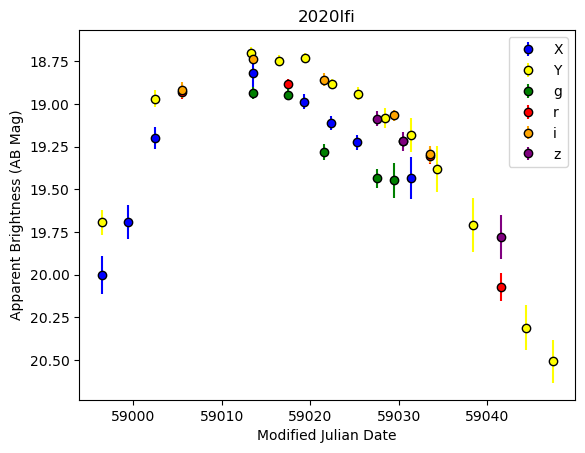

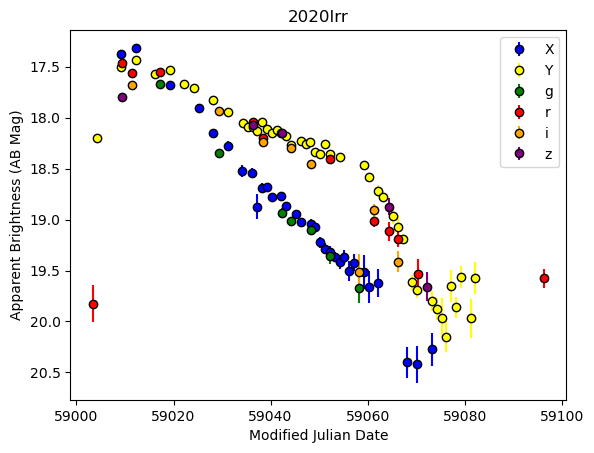

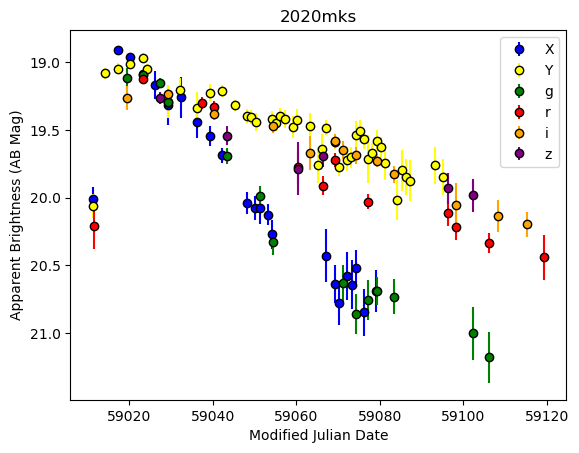

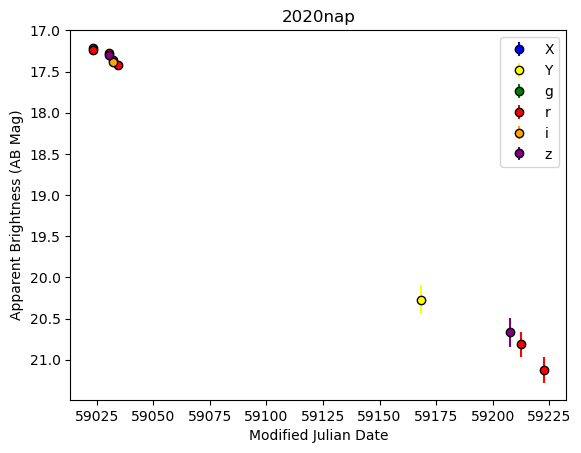

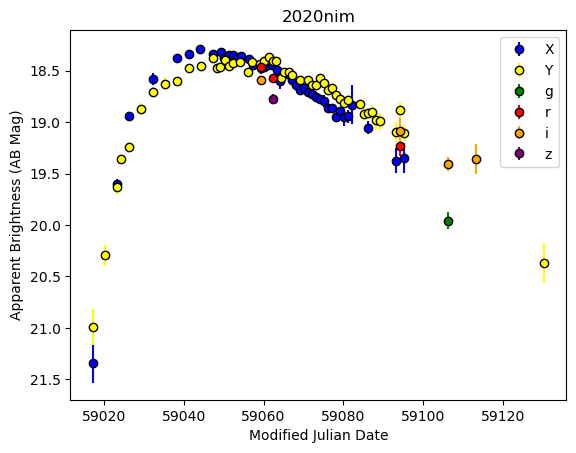

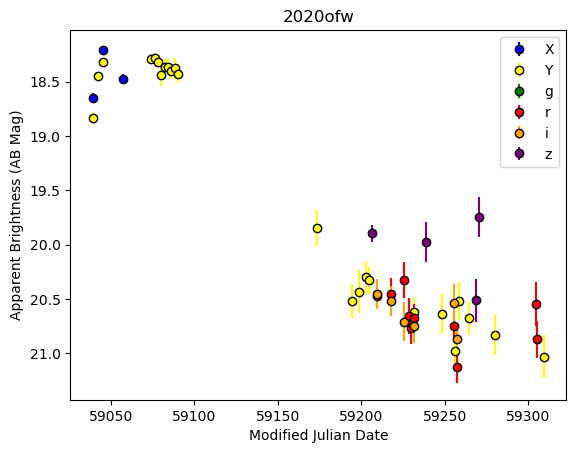

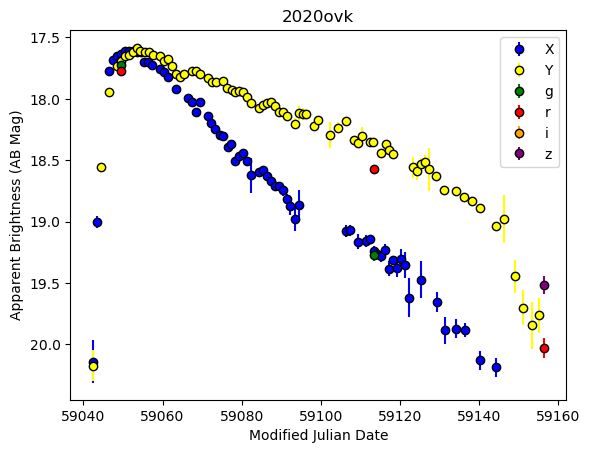

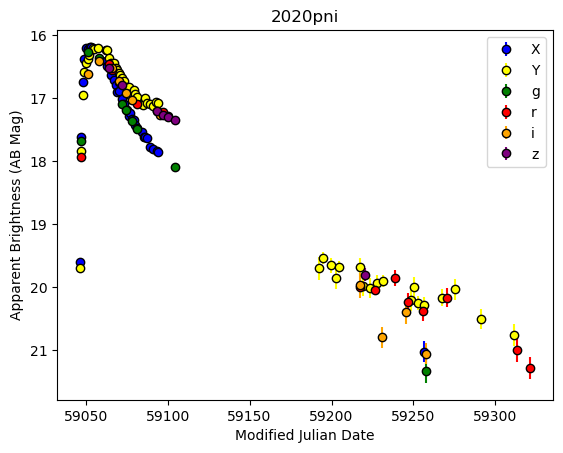

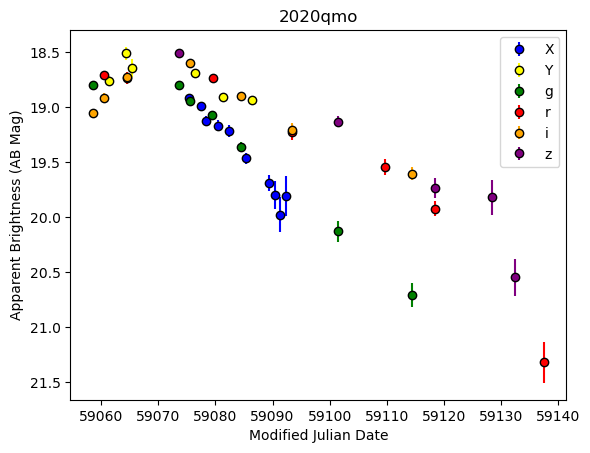

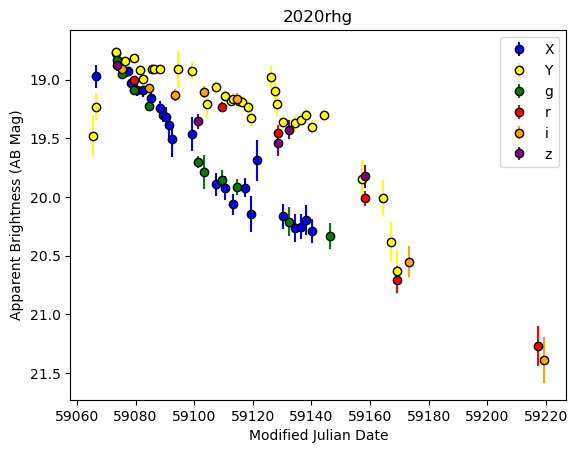

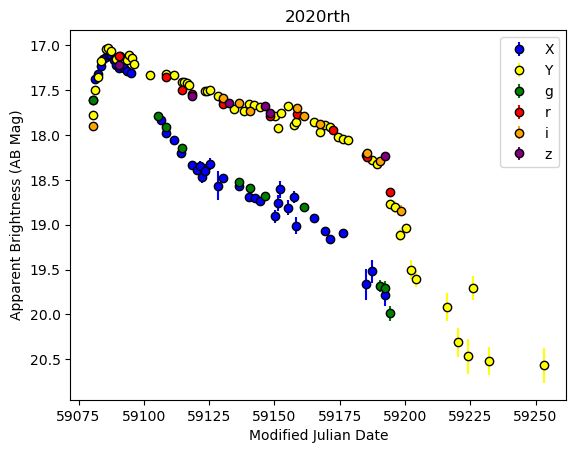

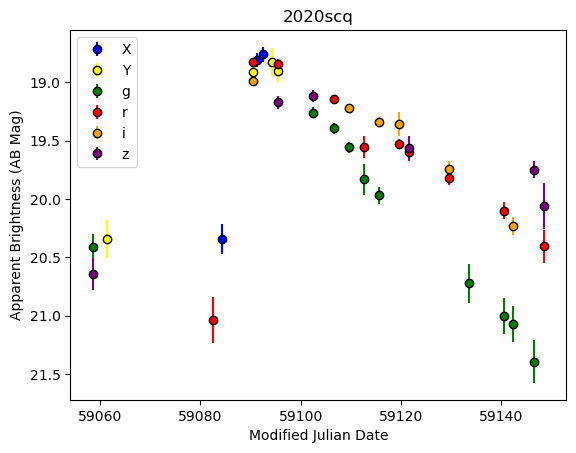

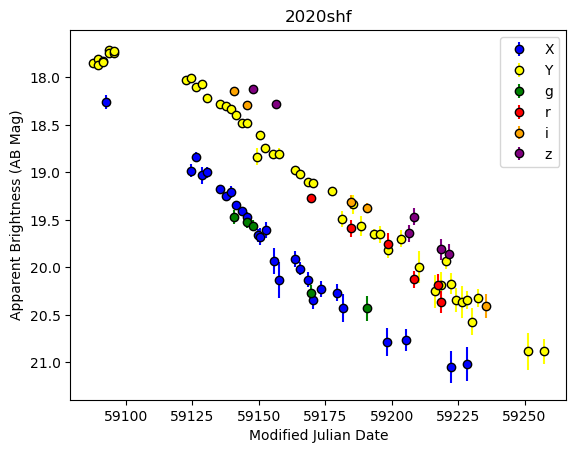

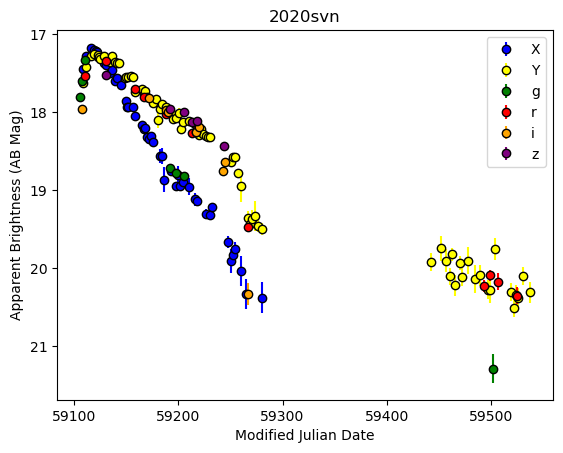

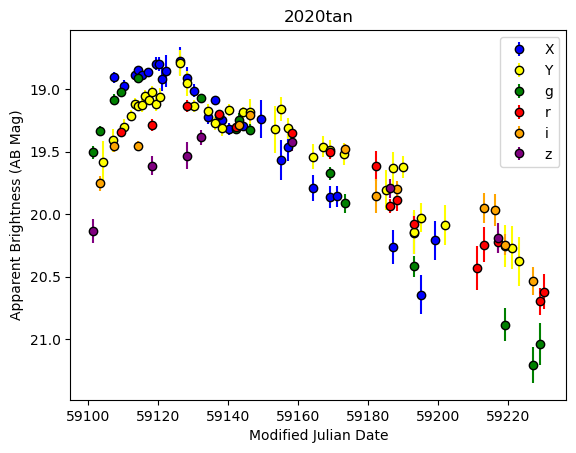

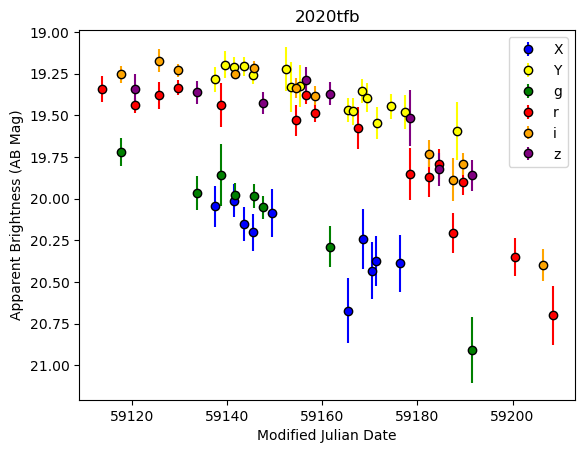

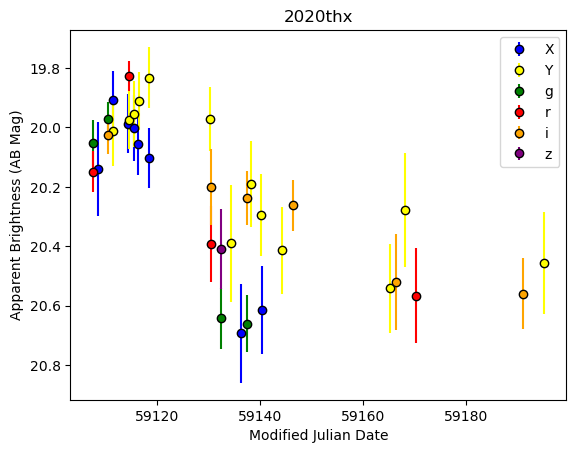

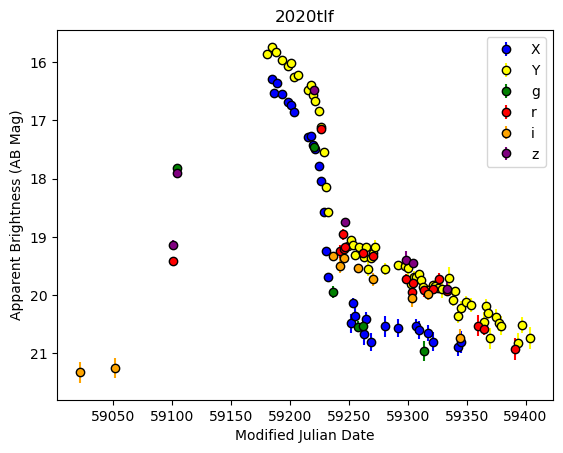

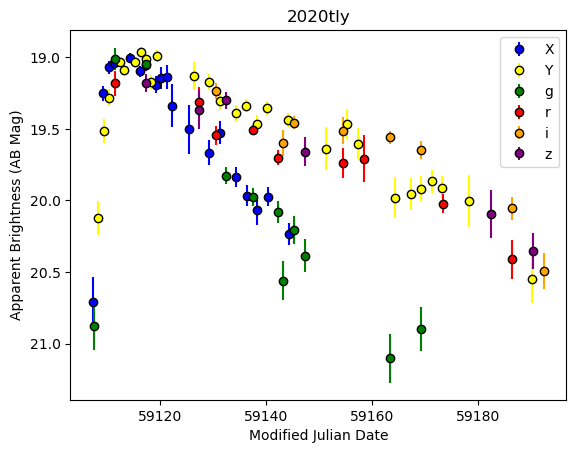

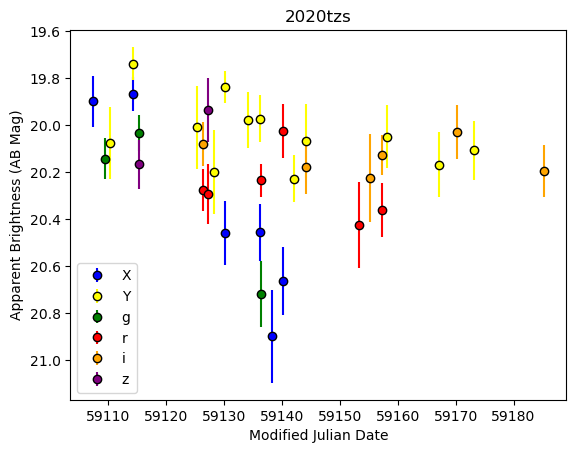

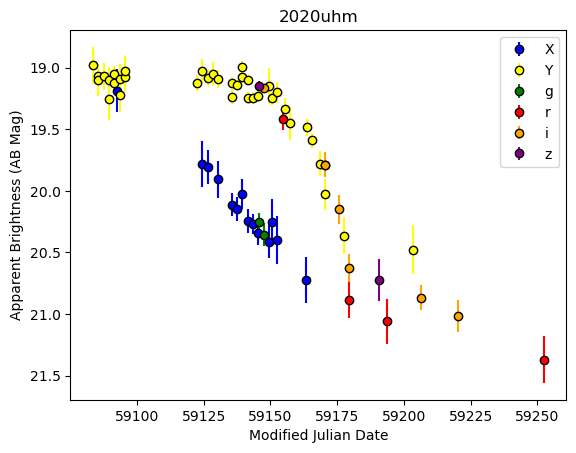

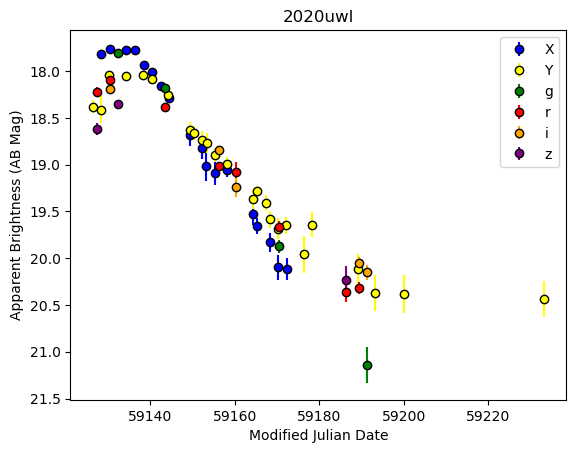

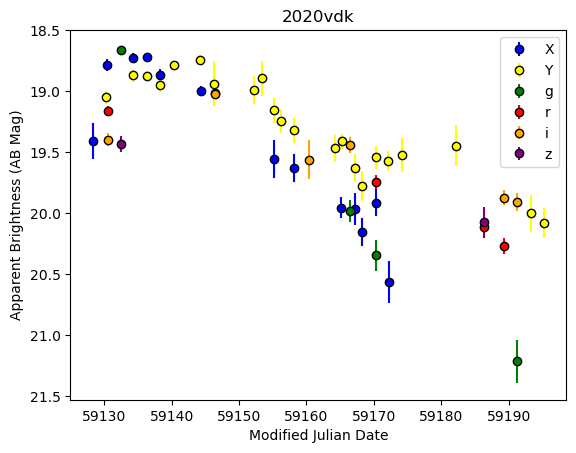

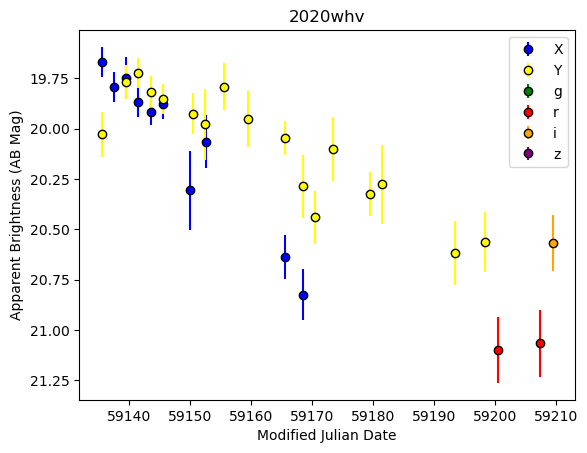

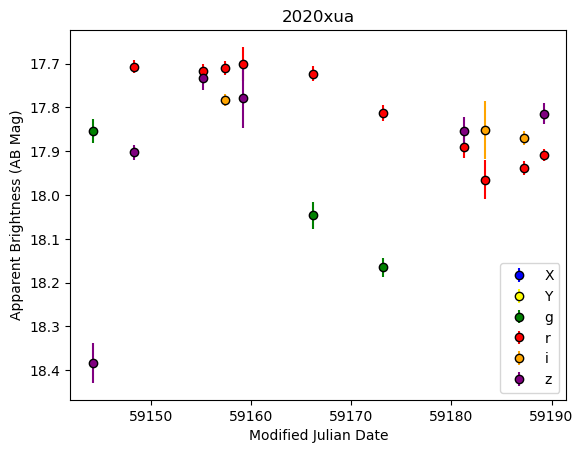

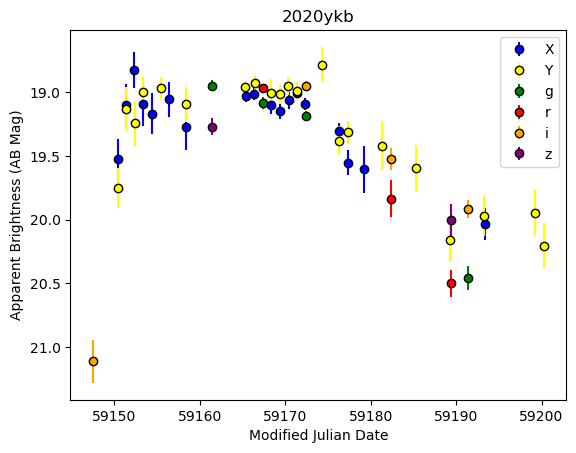

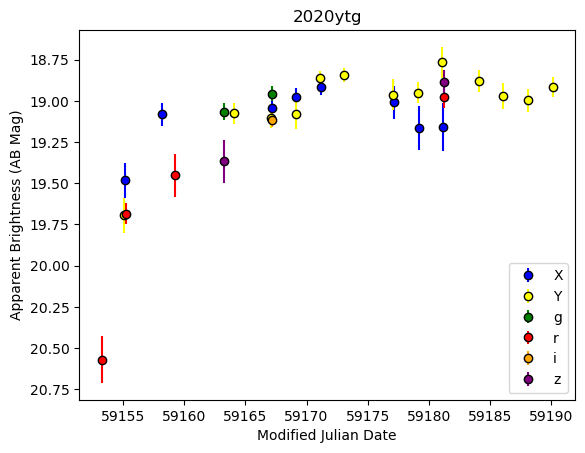

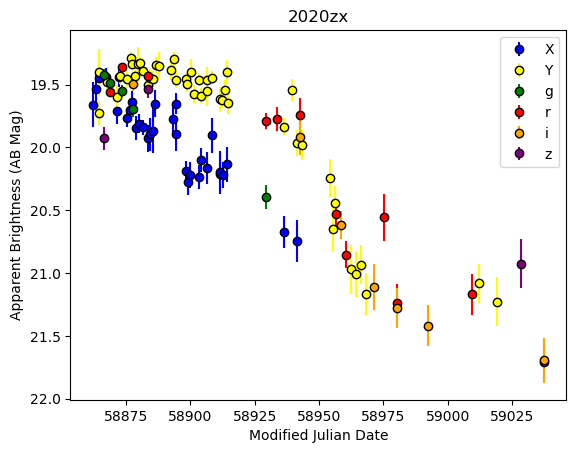

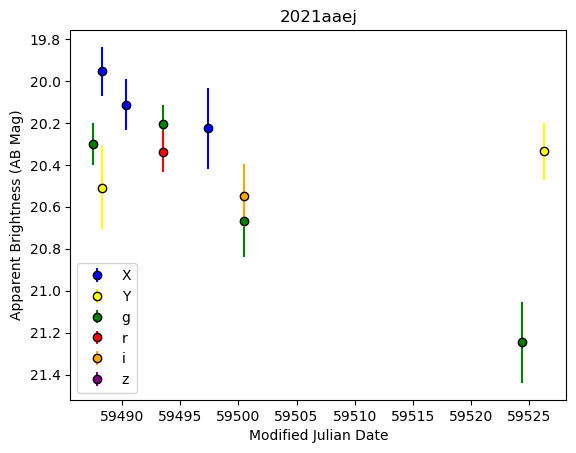

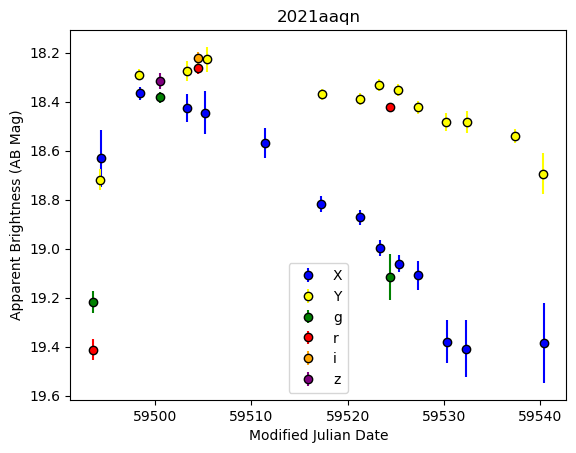

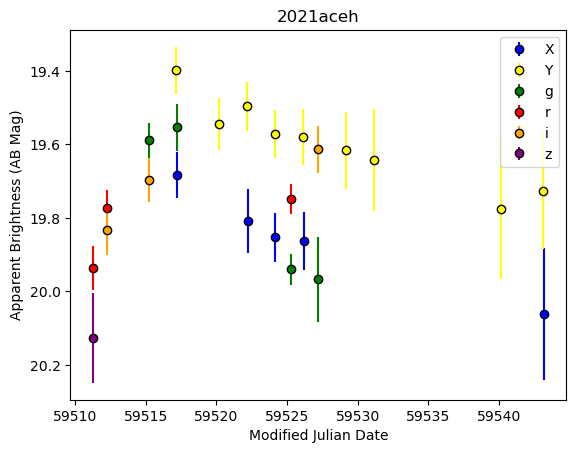

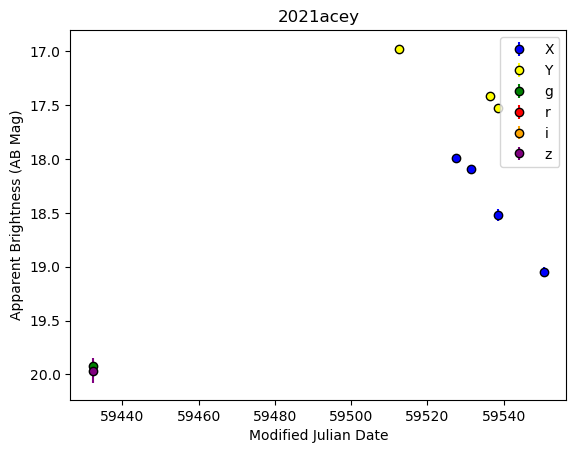

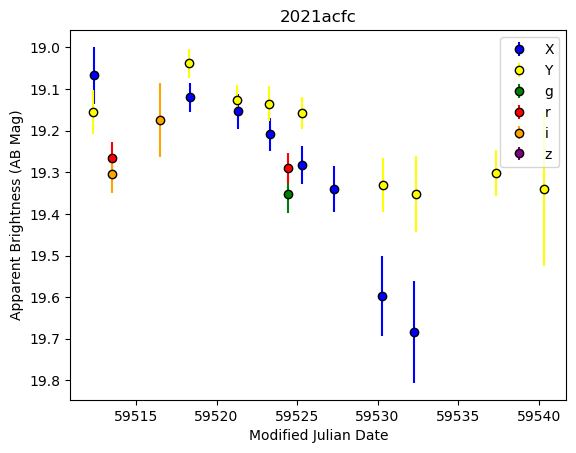

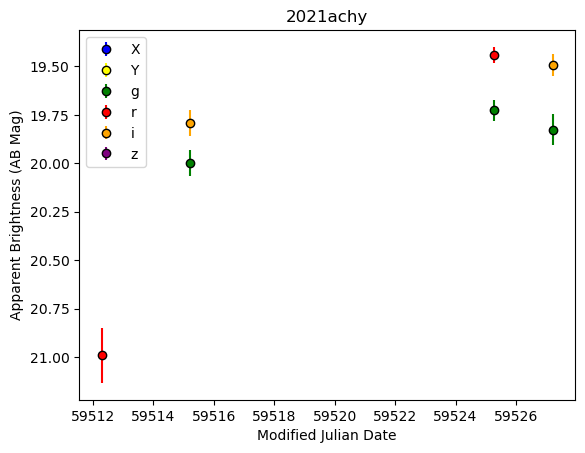

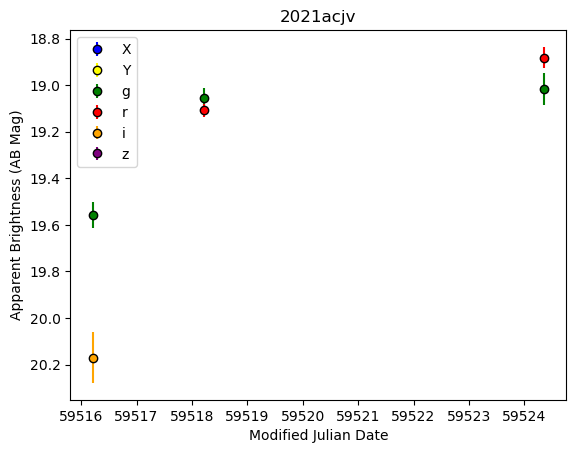

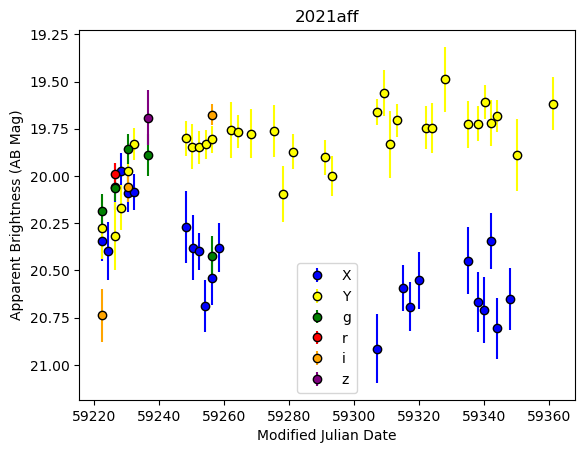

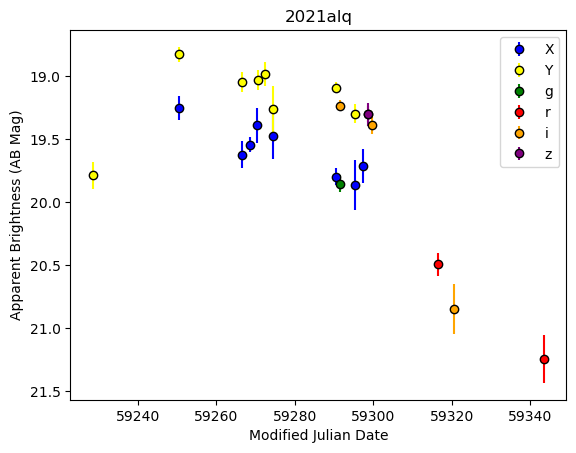

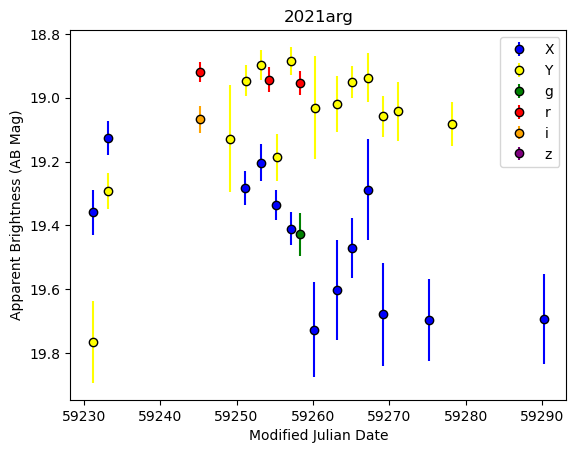

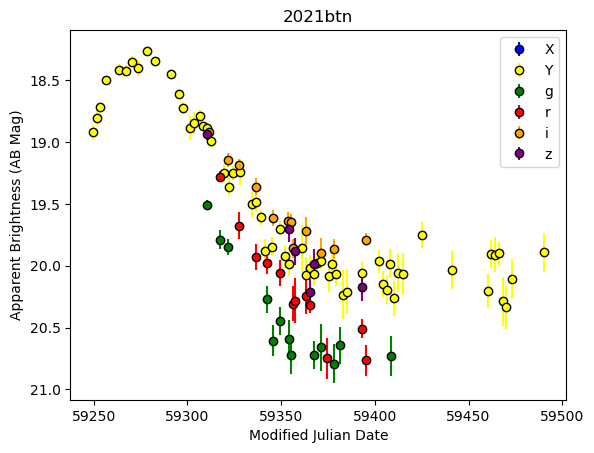

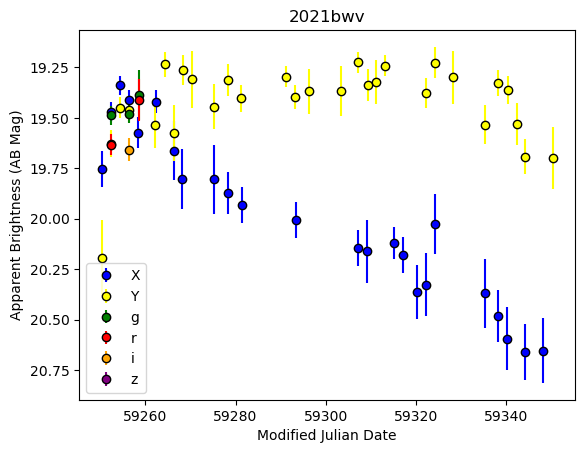

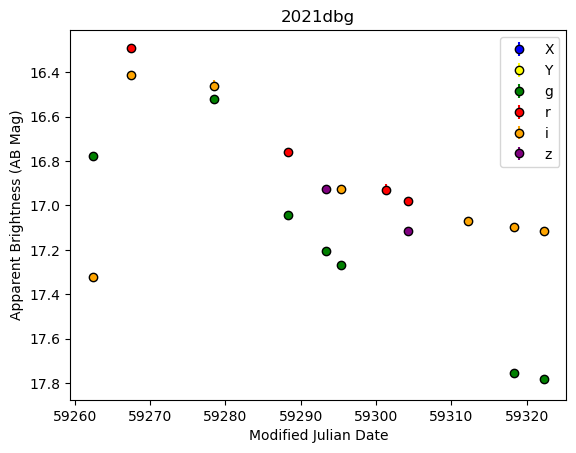

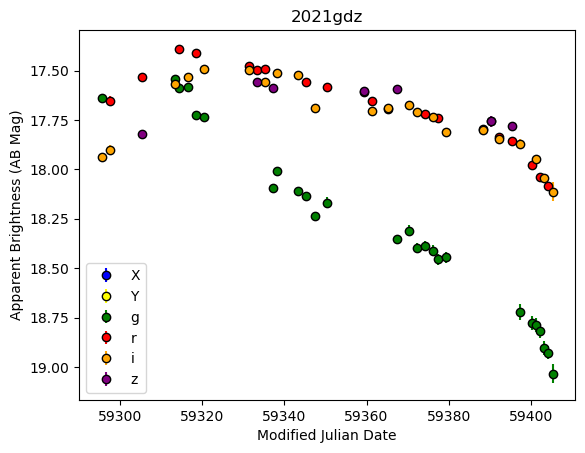

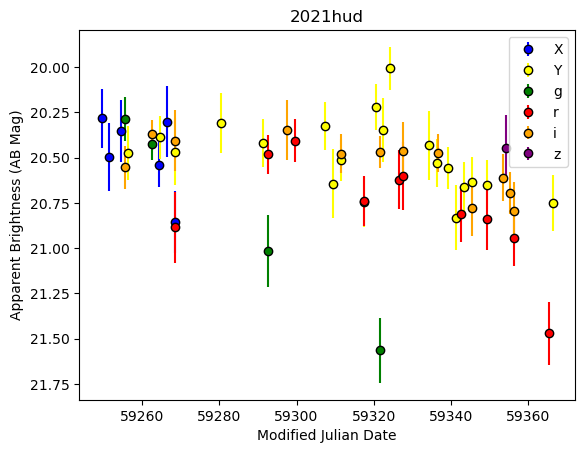

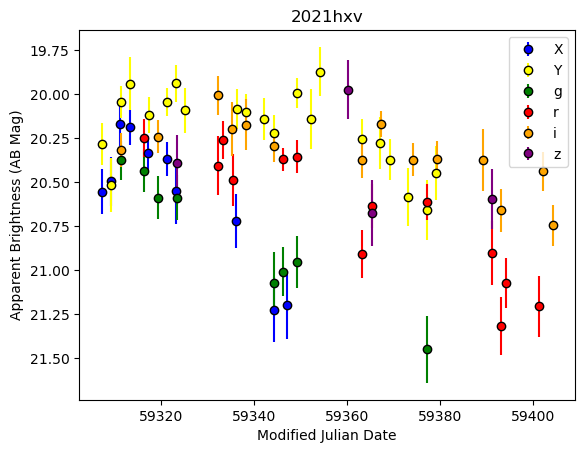

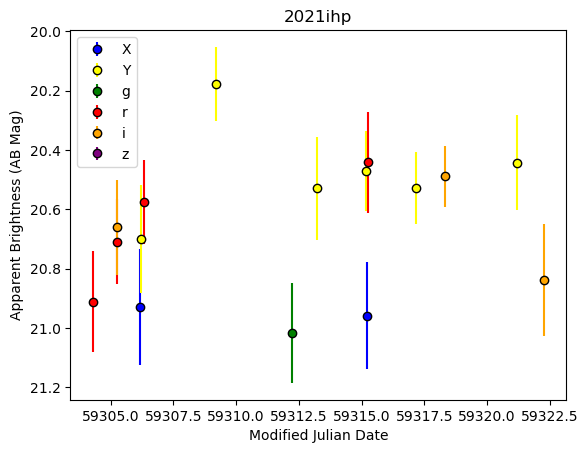

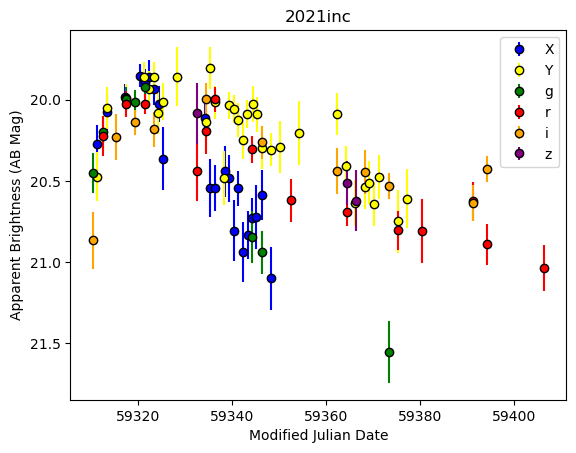

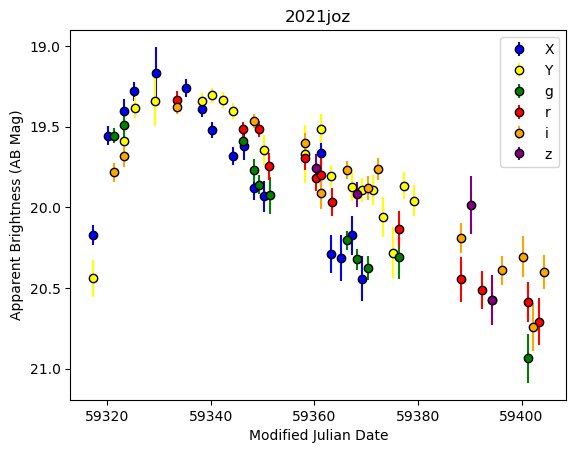

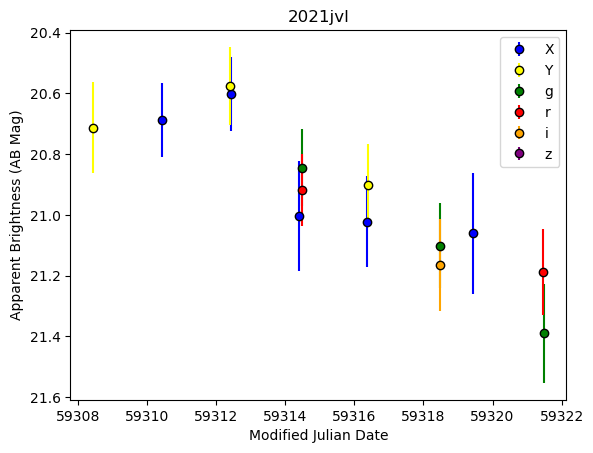

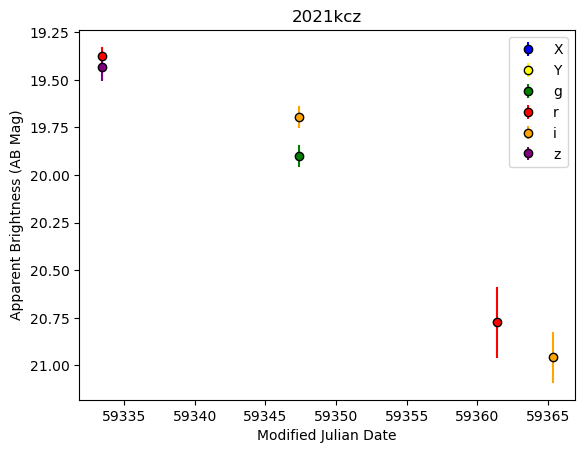

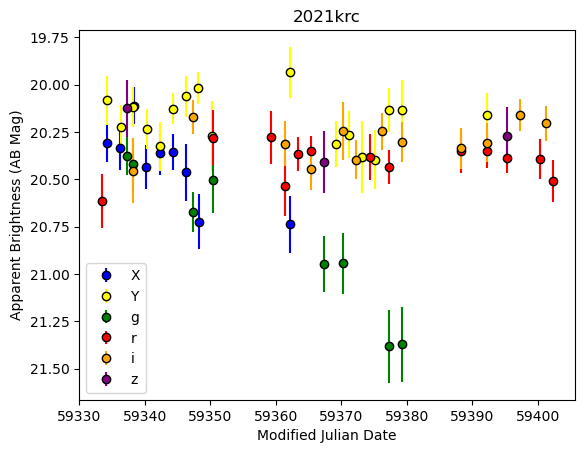

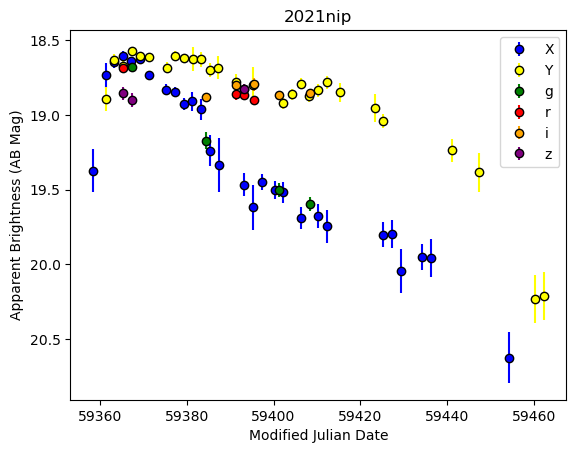

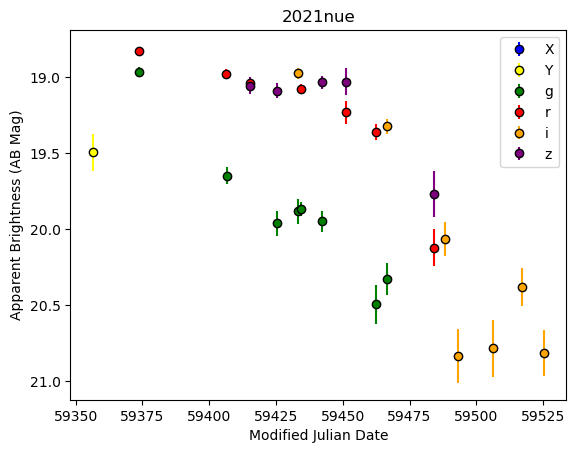

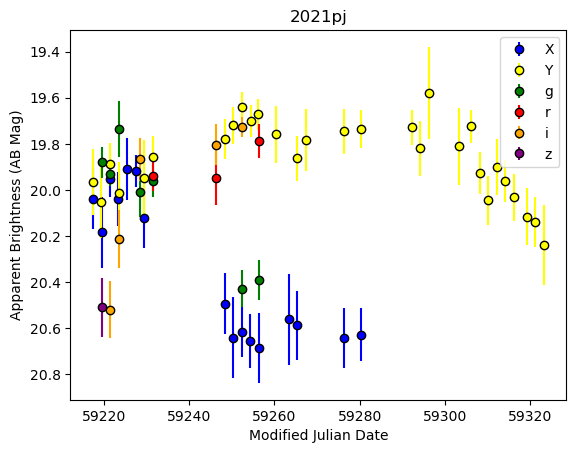

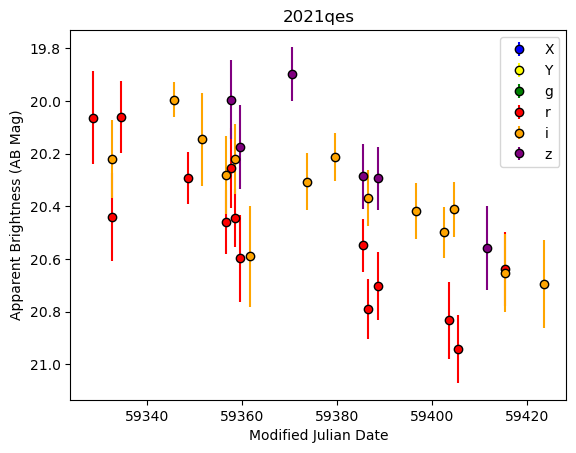

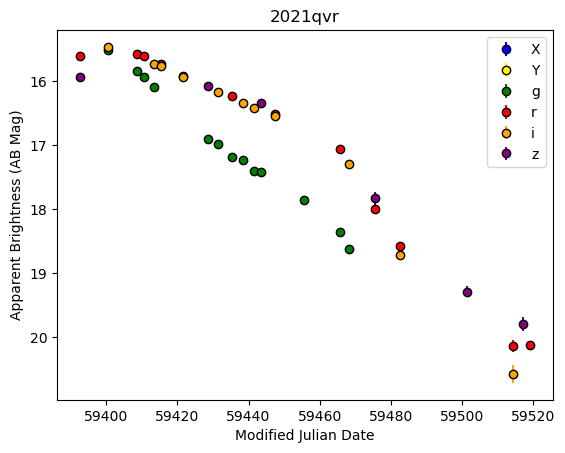

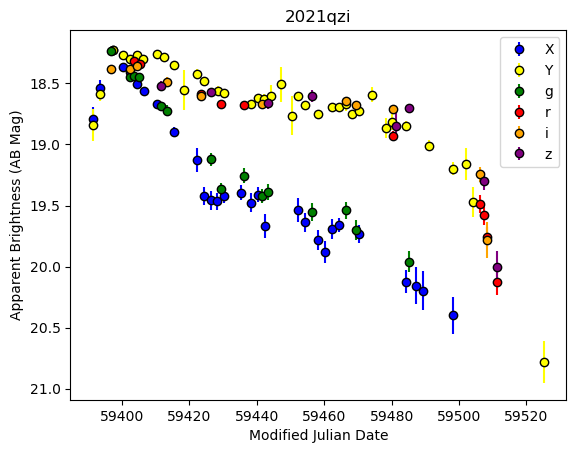

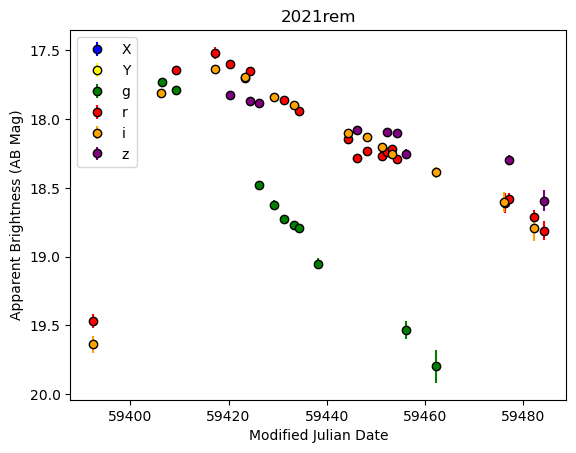

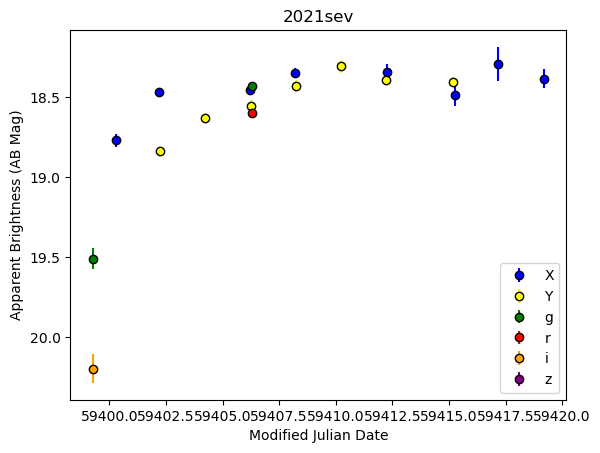

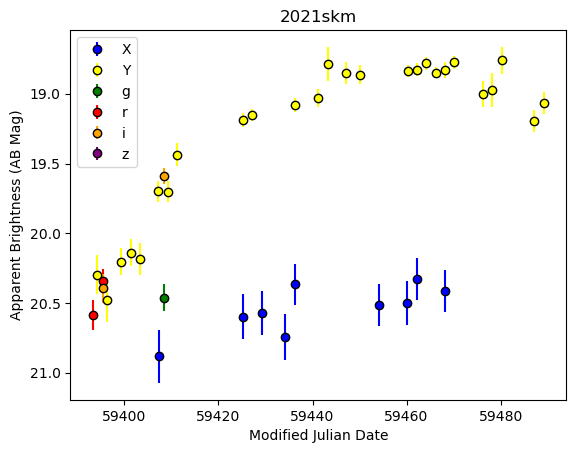

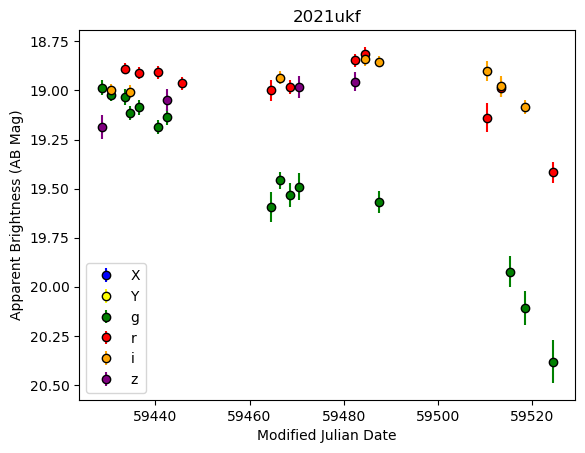

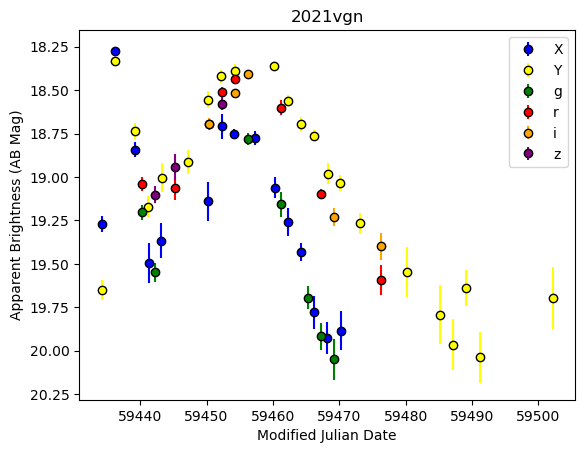

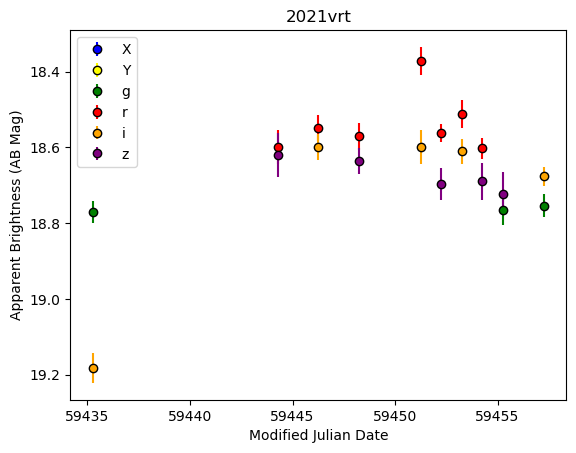

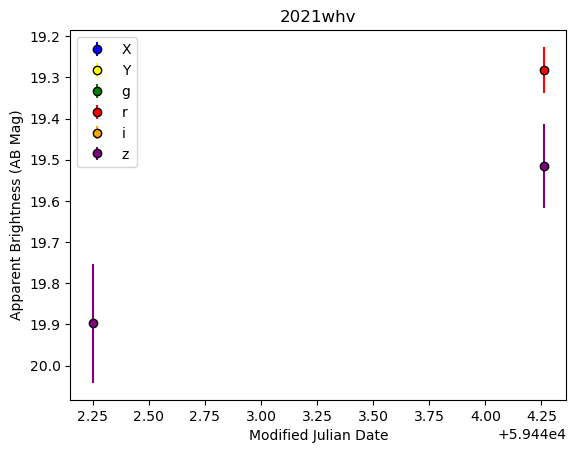

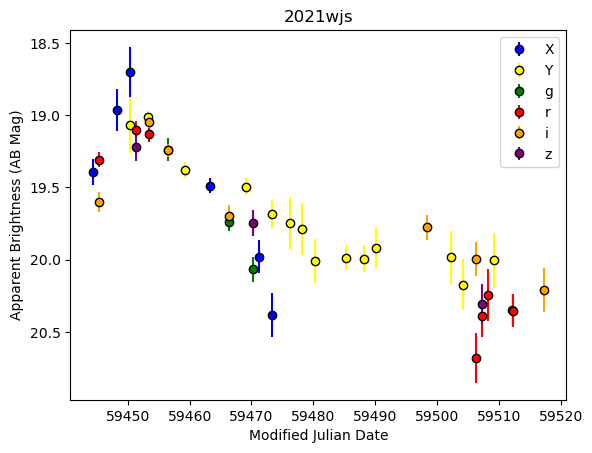

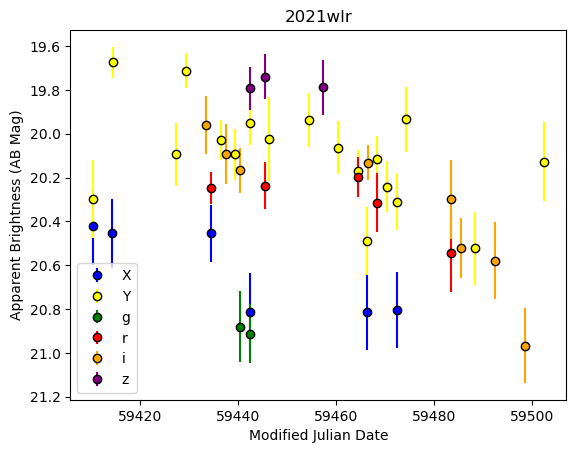

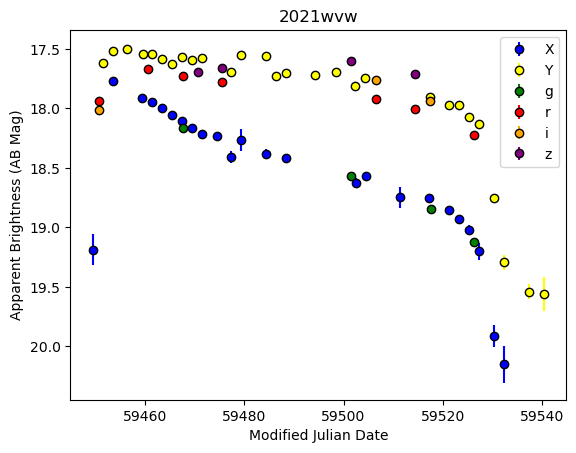

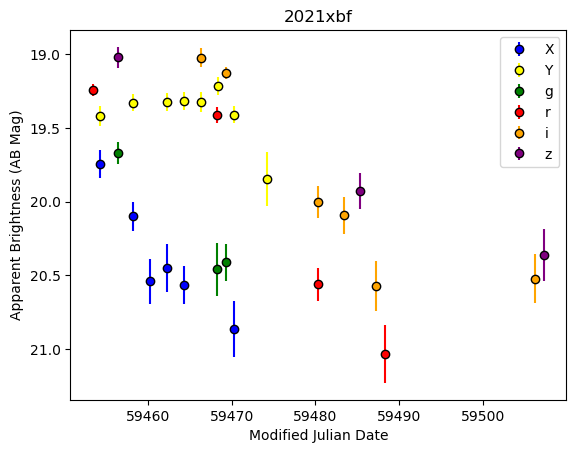

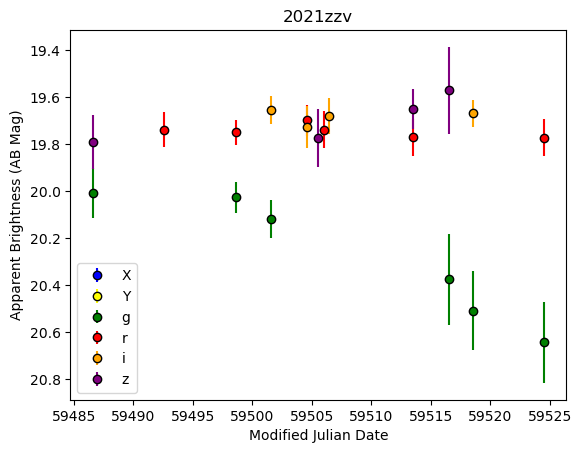

In [9]:
for idx, df in enumerate(full_df_list):
    plt.figure(idx)
    colors = {'X':'blue', 'Y':'yellow', 'g':'green', 'r':'red', 'i':'orange', 'z':'purple'}
    PAN = {}
    ZTF = {}
    for i, filt in enumerate(['X', 'Y']):
        mask = df['PASSBAND'] == filt
        upperlim = df['MAGERR'] < .2 
        mask = mask & upperlim
        l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        ZTF[filt] = l
    for i, filt in enumerate(['g', 'r', 'i', 'z']):
        mask = df['PASSBAND'] == filt
        mask = df['PASSBAND'] == filt
        upperlim = df['MAGERR'] < .2 
        mask = mask & upperlim
        l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
        PAN[filt] = l
    plt.gca().invert_yaxis()
    plt.title(full_snid_list[idx])
    plt.xlabel('Modified Julian Date')
    plt.ylabel('Apparent Brightness (AB Mag)')
    plt.legend()